# Evaluation Project-7

# Customer Churn Analysis

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
# importing all libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# loading the data set
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


We can see from the data that we have 7043 rows and 21 columns.<br>
The data has both object and numerical datatypes.<br>
Our target variable is churn which has binary inputs which makes this a classification problem.<br>
We can drop column CustomerID as it has no effect on target variable and provides irrelevant information.<br>

# Exploratory Data Analysis(EDA)

In [3]:
df.drop("customerID", axis=1, inplace=True)        # dropping column customerID

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


From above information we see that we have 1 column of float datatype, 2 columns of int and 17 columns of object datatype.<br>
All columns have same count of data 7043 .<br>
Lets split the data in datatypes

In [5]:
# getting list of object data type column names
obj_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        obj_d.append(x)
print("Object Data Type Columns are:\n", obj_d)

# getting the list of numeric data type column names
num_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_d.append(x)
print("\nNumber Data Type Columns are:\n", num_d)

Object Data Type Columns are:
 ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Number Data Type Columns are:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As only 3 numerical columns are there describe method is showing only that columns lets include all columns and see

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
1. We see count of columns is same.<br>
2. Except for total charges every variable has 2,3,4 unique values.<br>
3. Mean > median columns are : SeniorCitizen and tenure. Here the data is right skewed.<br>
4.Meadian> mean column is MonthlyCharges here the data is left skewed.<br>
5. Also difference between 75 % and max value is large indicating presence of outiers

# Checking Null values

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

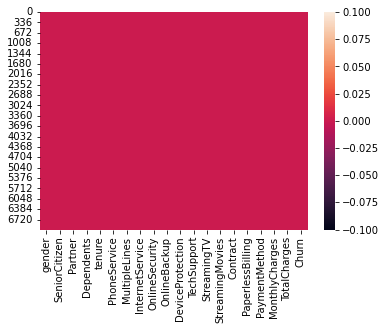

In [9]:
sns.heatmap(df.isnull())

We have no null values in our data

# Checking Duplicates

In [10]:
df.shape            # checking the current shape of data

(7043, 20)

In [11]:
df.duplicated().sum()

22

We have 22 duplicate rows which needs to be removed

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(7021, 20)

After dropping duplicates, shape of new data is 7021 rows and 20 columns

# Checking Unique values and Value Counts

In [13]:
df.nunique().sort_values().to_frame('Unique Value')

,Unique Value
gender,2
PaperlessBilling,2
PhoneService,2
Churn,2
Partner,2
SeniorCitizen,2
Dependents,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [14]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
************************************************************************************************************************
SeniorCitizen
0    5880
1    1141
Name: SeniorCitizen, dtype: int64
************************************************************************************************************************
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
************************************************************************************************************************
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
************************************************************************************************************************
tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
******************************************************************************************************

It looks like all the columns have proper categories but the column "TotalCharges" has float value still gets tagged as object data type plus 11 rows of that column has blank data. We will need to treat this 

In [15]:
df['TotalCharges'] = df['TotalCharges'].replace(' ' , '0.0')
df['TotalCharges'].value_counts()

0.0       11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
df['TotalCharges'] = df['TotalCharges'].astype('float')
df['TotalCharges'].dtype

dtype('float64')

Similarly SeniorCitizen is showing numeric datatype which needs to be changed to object datatype.

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df['SeniorCitizen'].dtype

dtype('O')

After converting the TotalCharges and SeniorCitizen datatypes lets update the list obj_d and num_d

In [18]:
# getting list of object data type column names
obj_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'O':
        obj_d.append(x)
print("Object Data Type Columns are:\n", obj_d)

# getting the list of numeric data type column names
num_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_d.append(x)
print("\nNumber Data Type Columns are:\n", num_d)

Object Data Type Columns are:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Number Data Type Columns are:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


# Visualizations

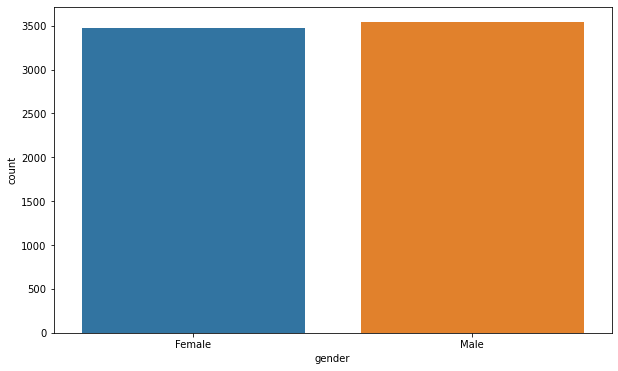

************************************************************************************************************************


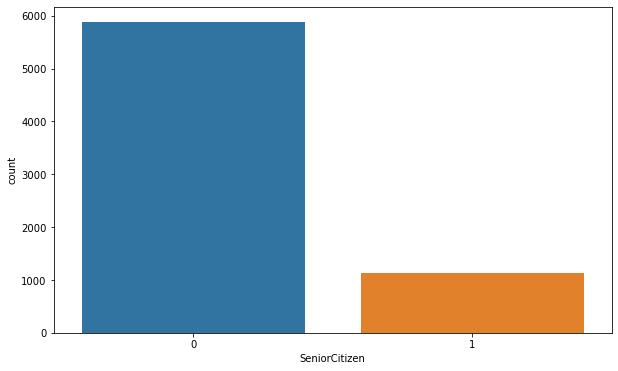

************************************************************************************************************************


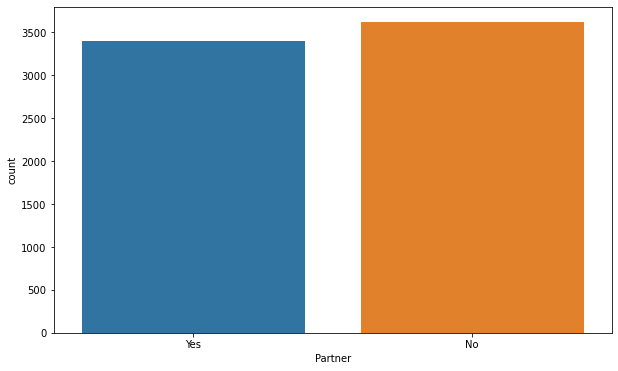

************************************************************************************************************************


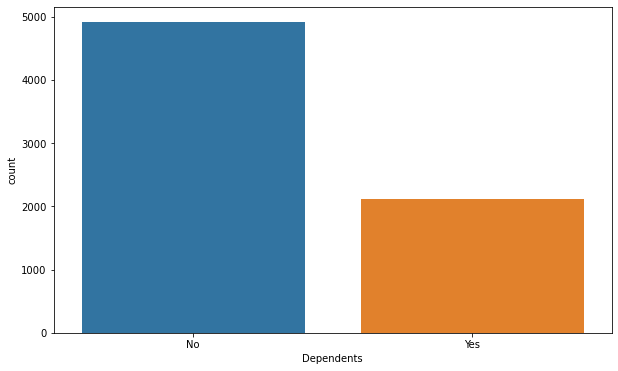

************************************************************************************************************************


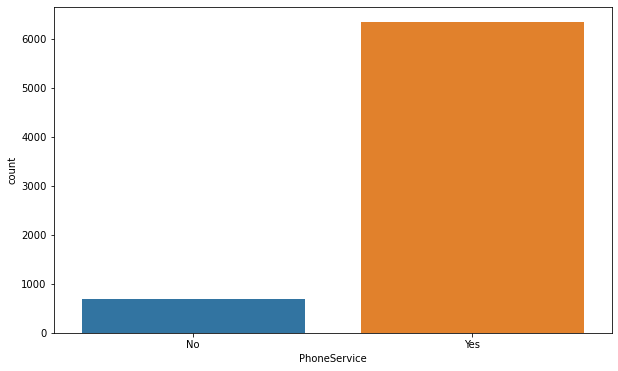

************************************************************************************************************************


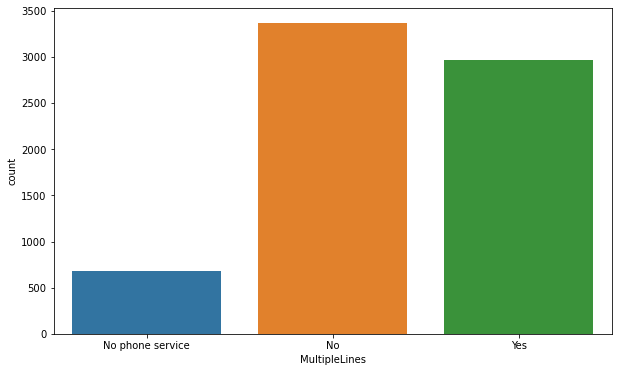

************************************************************************************************************************


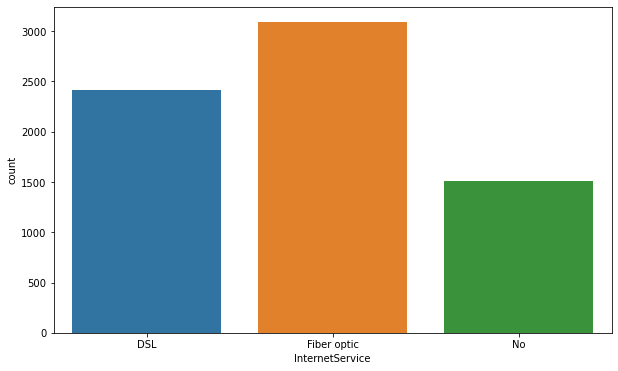

************************************************************************************************************************


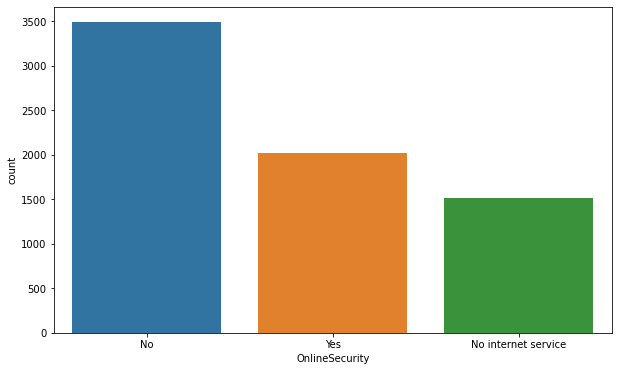

************************************************************************************************************************


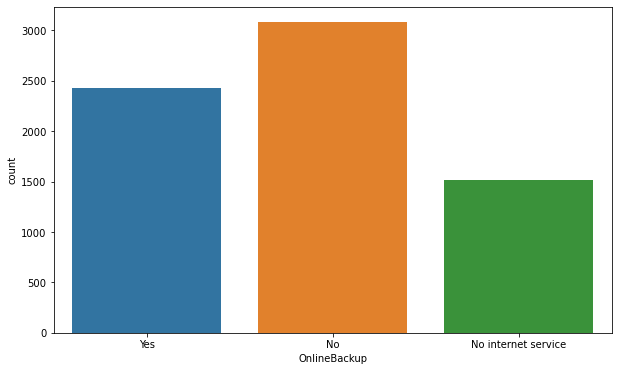

************************************************************************************************************************


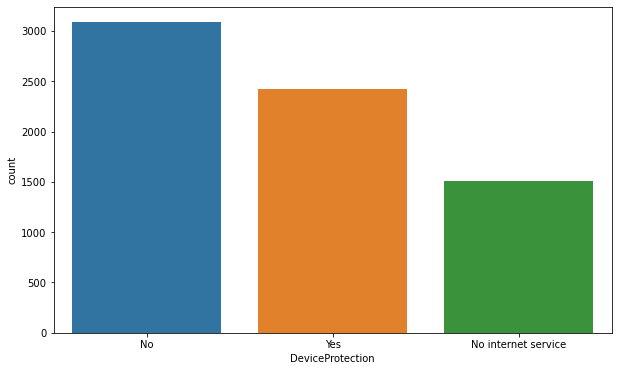

************************************************************************************************************************


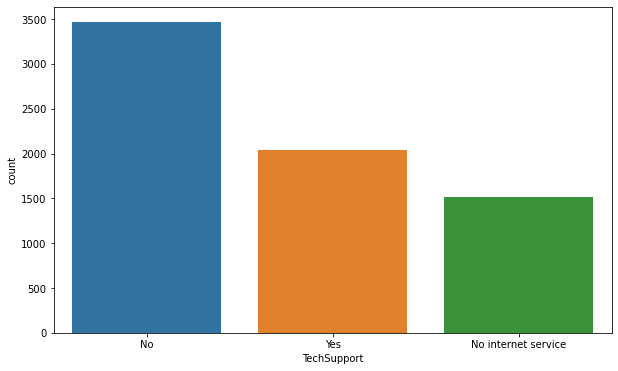

************************************************************************************************************************


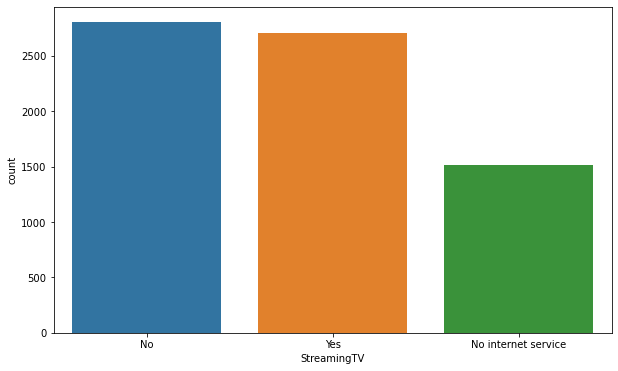

************************************************************************************************************************


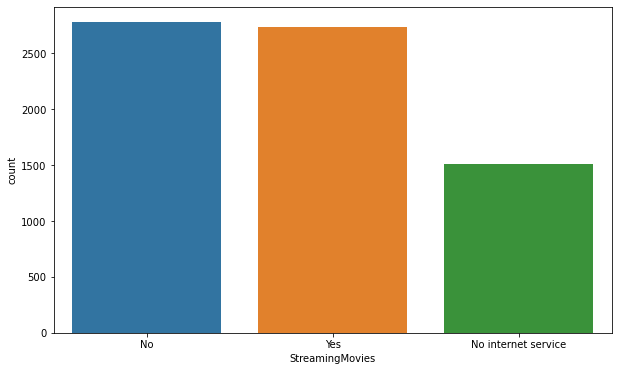

************************************************************************************************************************


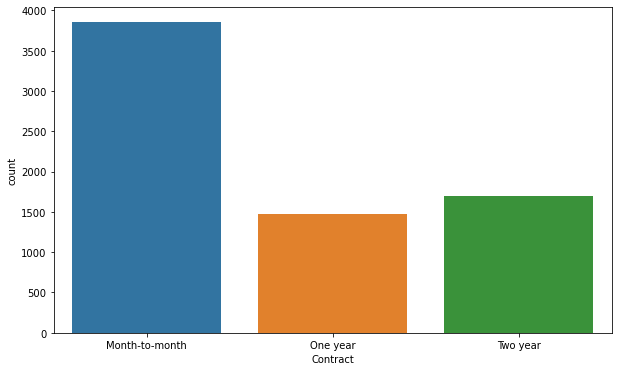

************************************************************************************************************************


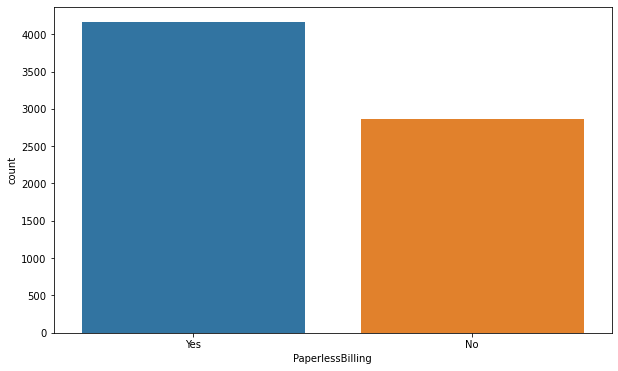

************************************************************************************************************************


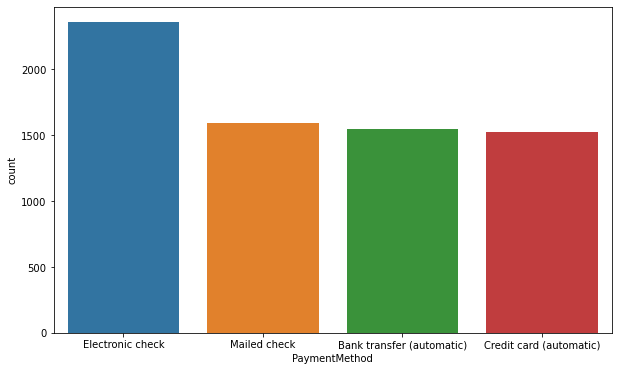

************************************************************************************************************************


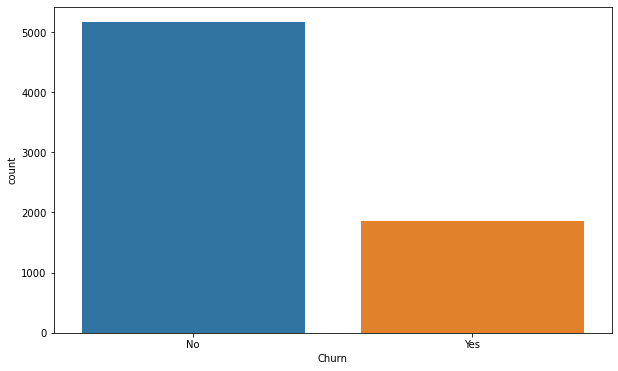

************************************************************************************************************************


In [19]:
for column in df.columns:
    if df[column].dtypes == object:
        plt.figure(figsize=(10,6))
        sns.countplot(df[column])
        plt.show()
        print('*'*120)

Observations:
1. Male and female customers are almost same in number.<br>
2. There are very less senior citizens as customers.<br>
3. More prople are not partners.<br>
4. There are less dependents.<br>
5. People with a phone service cover a large data chunk while there are only few people who do not own a phone service.<br>
6. People with single line are higher in number than people who have multiple lines but we also see a minority of people who do not own a phone service yet.<br>
7. Most customers use fibre optic thsn DSL.<br>
8. Most customers use no onine security just like no online backup.<br>
9. Most cutomers do not use Tech Support.<br>
10.Most customers do not use Tv same .<br>
11.Customers having month to month contract are more.<br>
12.Most customers prefer paperless billing.<br>
13.Most customers use Electronic check for payment method.<br>
14.No Churn" values are way higher than "Yes Churn" data. Since this is our target label it indicates an imbalanced data which will need to be rectified later on.

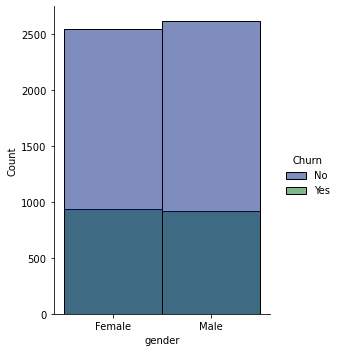

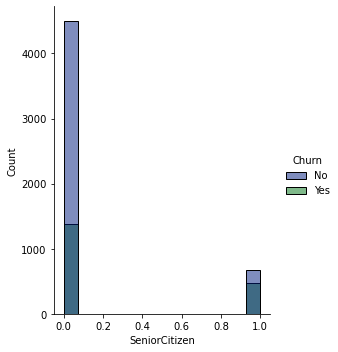

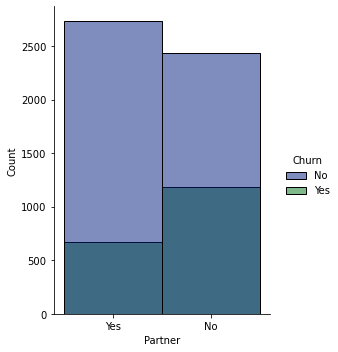

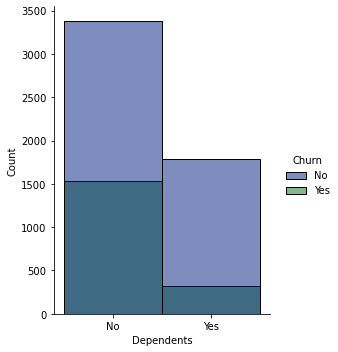

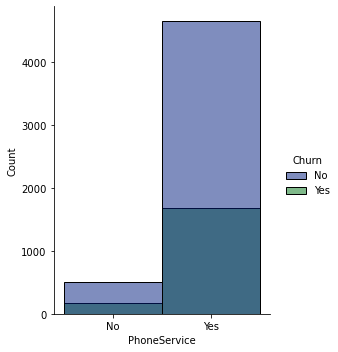

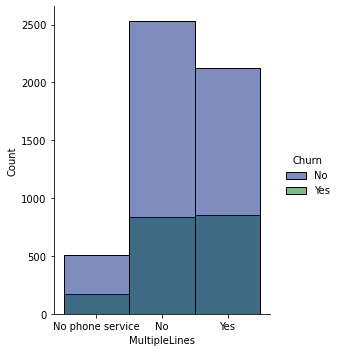

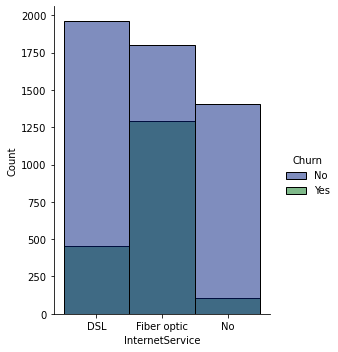

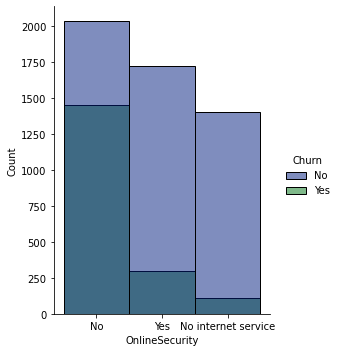

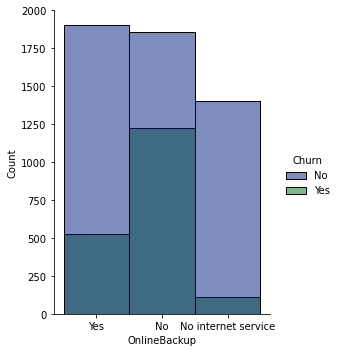

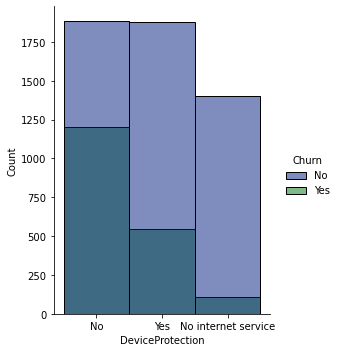

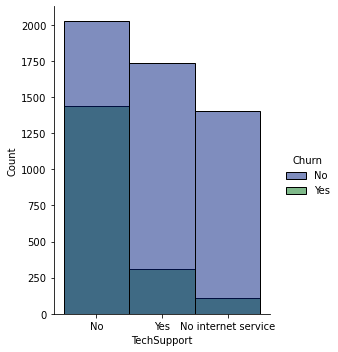

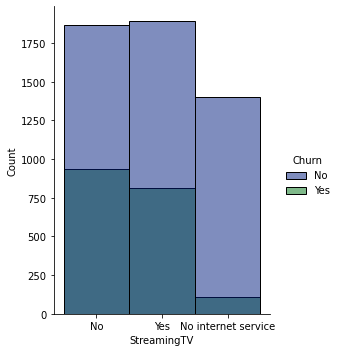

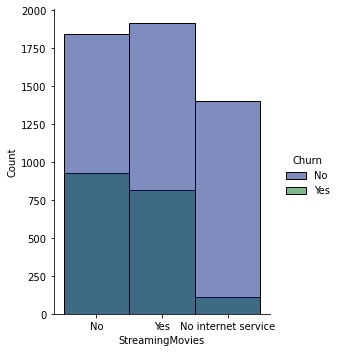

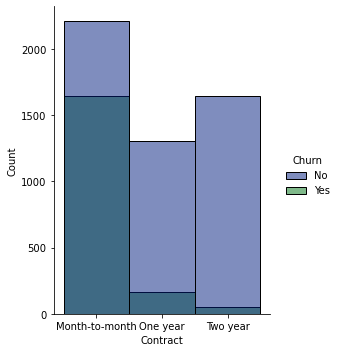

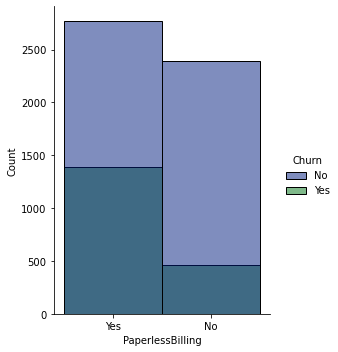

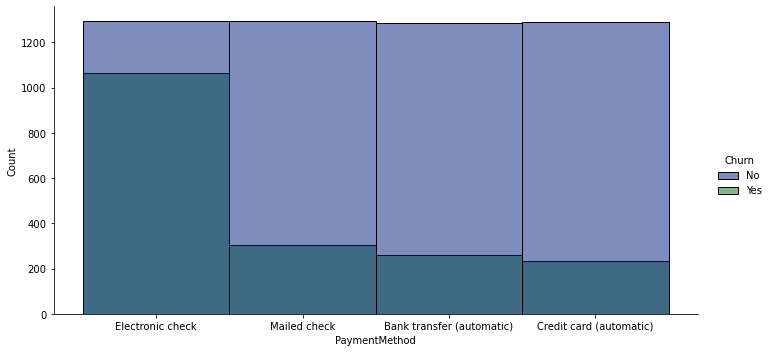

In [20]:
plt.style.use('seaborn-dark-palette')

data=obj_d
data.remove('Churn')
new_list=data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

With the help of above bar plot we can identify the No churn and Yes churn data and understand that the "Yes Churn" option has been significantly lower than it counterpart. However area where it is higher are the pain points that will need to be resolved so that we can continue to retain our customer base.

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

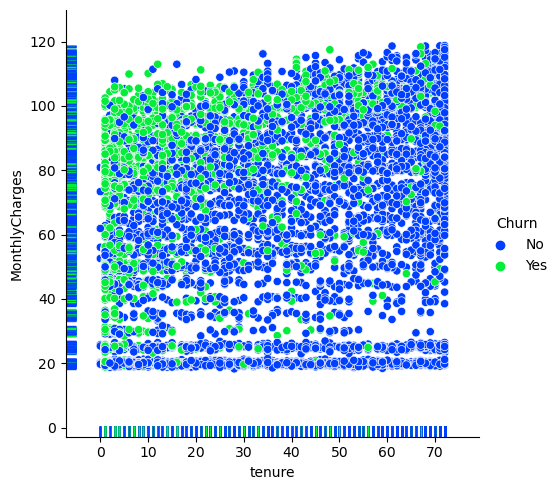

In [21]:
plt.style.use('default')
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people in the initial months of service usage are more prone to discontinue if they are unhappy with the service offered to them and therefore strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

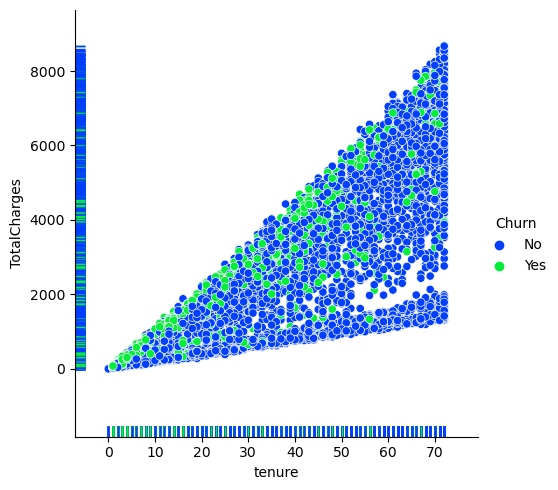

In [22]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

The above plot shows us that as the tenure increases the total charge increase as well and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

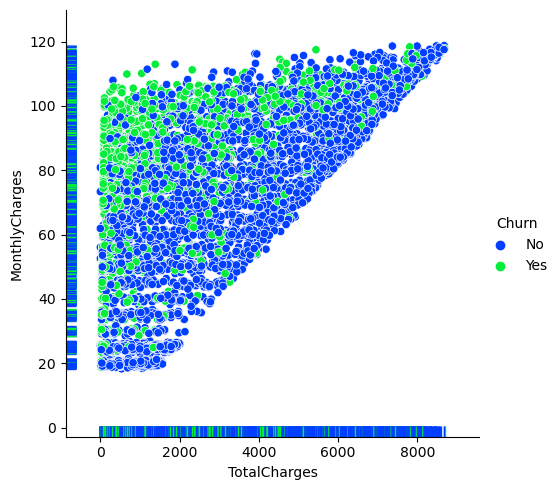

In [23]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

The above plot shows us that people with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

# Encoding the categorical data

In [24]:
# Label Encoder

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [25]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

df=ordinal_encode(df, ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'SeniorCitizen',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0
2,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1
3,1.0,0.0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0
4,0.0,0.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1


In [26]:
df.isnull().sum()   # chcking if there are any null values after applying encoding

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking Outliers

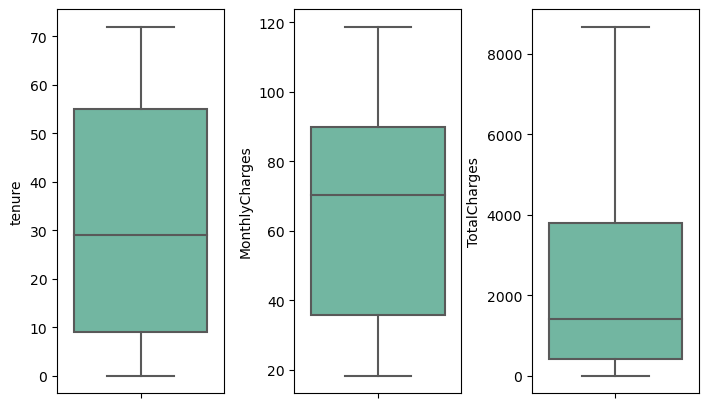

In [27]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[num_d].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

I have used box plot on numerical data and found no outliers.

# Checking Skewness

In [28]:
df.skew().sort_values()

PhoneService       -2.721300
PaperlessBilling   -0.377214
MonthlyCharges     -0.224097
PaymentMethod      -0.166267
gender             -0.017381
StreamingMovies     0.012488
StreamingTV         0.026366
Partner             0.061857
MultipleLines       0.112816
OnlineBackup        0.181338
DeviceProtection    0.185268
InternetService     0.208589
tenure              0.235542
TechSupport         0.401511
OnlineSecurity      0.416182
Contract            0.626004
Dependents          0.870322
TotalCharges        0.959910
Churn               1.068139
SeniorCitizen       1.829987
dtype: float64

Ignoring the categorical encoded data's skewness we find skewness in TotalCharges.<br>
we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.<br>
we will treat the skewness that is present in our continous data columns.<br>

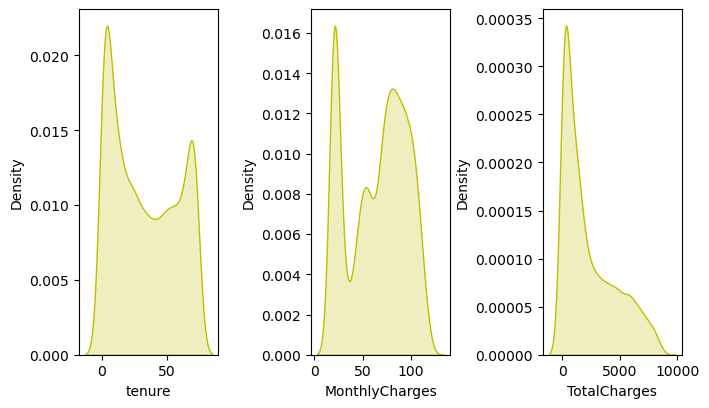

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(7,4))
index = 0
ax = ax.flatten()
for col, value in df[num_d].items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


 we can see that our continous data columns have some skewness that will need to be treated and reduced to cover up an acceptable range in data values.

# Removing Skewness

In [30]:
for col in num_d:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

Hence we have removed the skewness using log transform

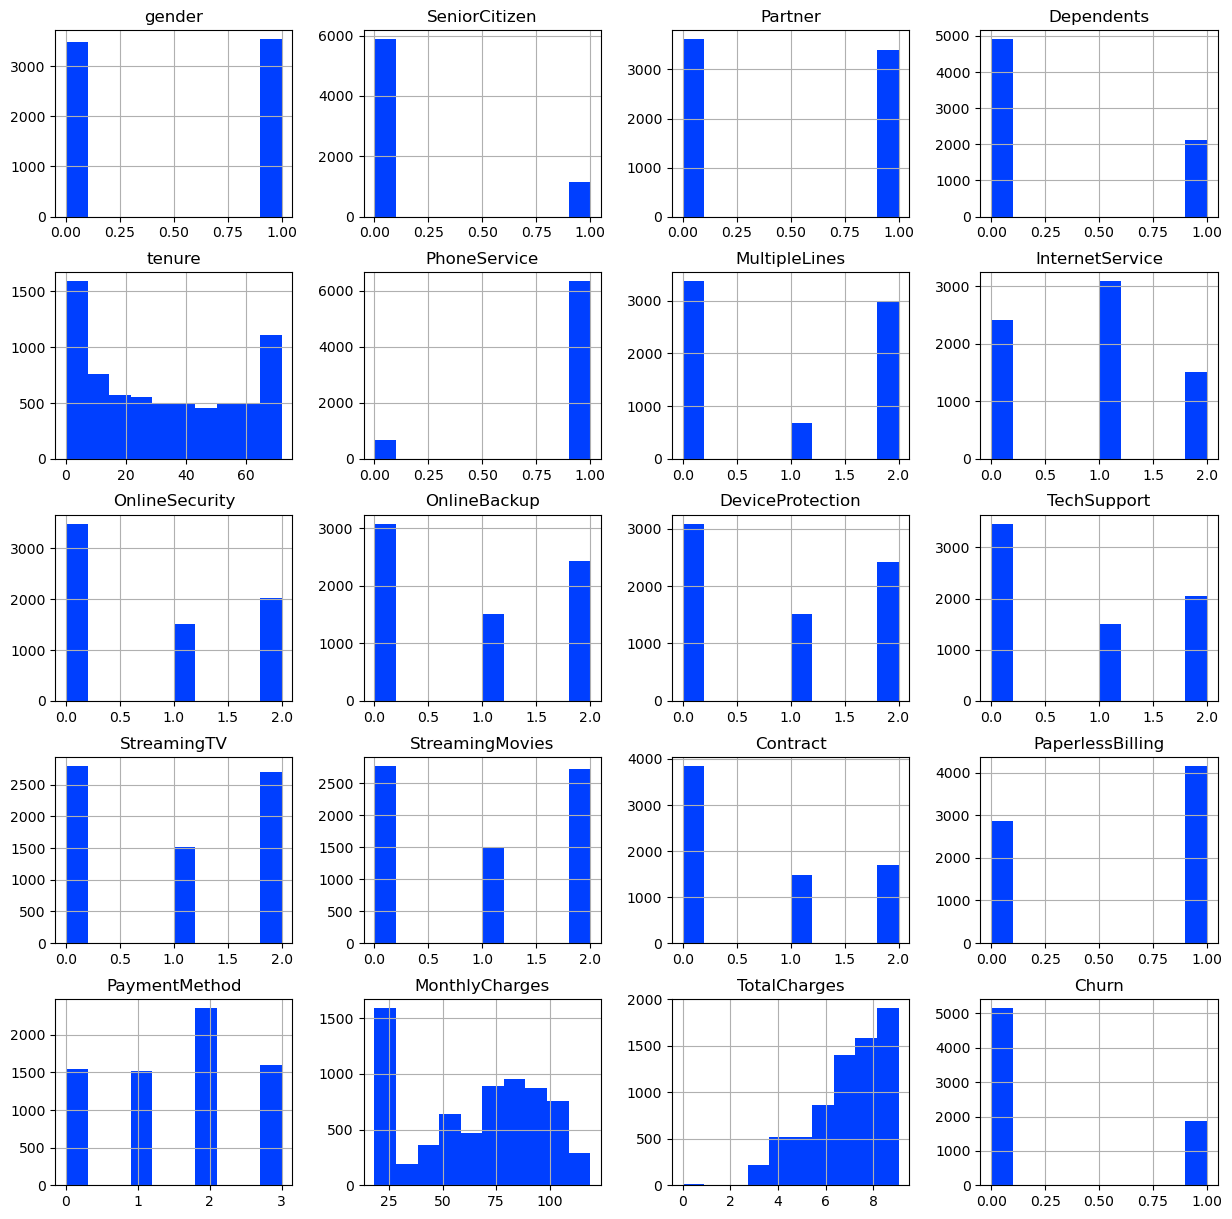

In [31]:
df.hist(figsize=(15,15))
plt.show()

After applying encoding, we see with the help of histogram how the data is distributed.<br>

# Correlation

In [32]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,-0.004556,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.145521,-0.031221,-0.128267,-0.013675,-0.021448,-0.151349,0.030704,0.047209,-0.143624,0.156196,-0.037320,0.219434,0.100778,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.325187,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.078467,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.828891,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,-0.019554,0.387549,-0.015026,0.024439,0.004043,-0.018980,0.055807,0.044322,0.003101,0.016824,-0.005304,0.248984,0.076664,0.011323
MultipleLines,-0.005939,0.145521,0.139827,-0.027083,0.340458,-0.019554,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.427530,0.040175
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.198240,-0.047366
OnlineSecurity,-0.015262,-0.128267,0.150589,0.151984,0.325762,-0.015026,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.215815,-0.288505
OnlineBackup,-0.012182,-0.013675,0.152518,0.090502,0.370824,0.024439,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.303733,-0.194214


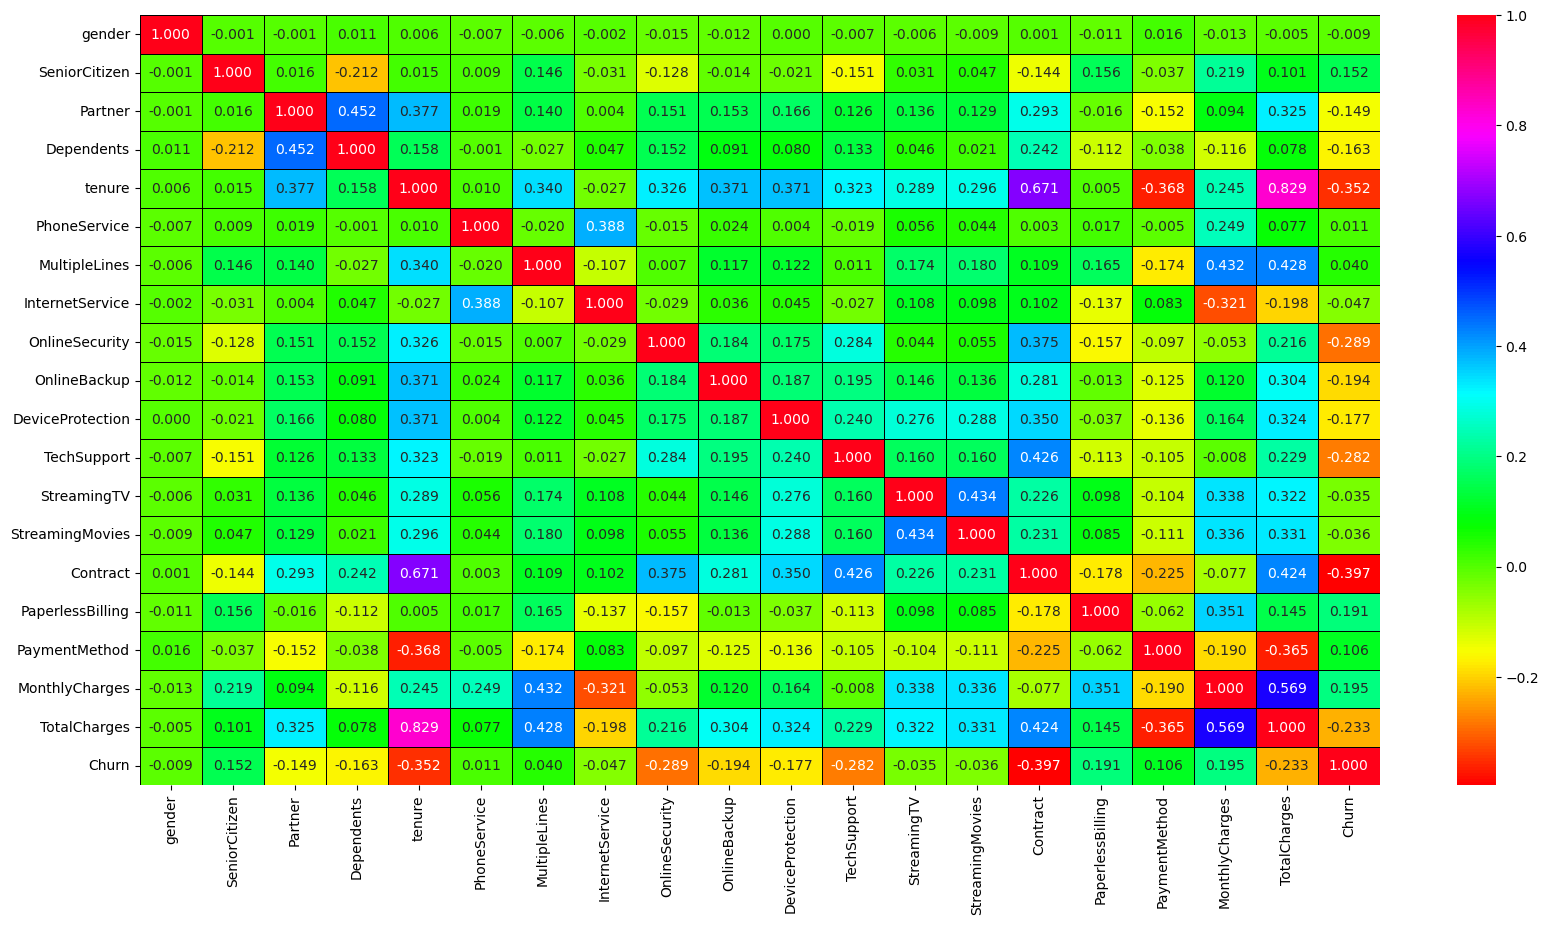

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot =True,fmt='0.3f',cmap="hsv",linewidth=0.5,linecolor='black' )
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Observations:
1. Columns positively and highly correlated with Churn are: PaperlessBilling, Monthly charges.<br>
2. columns negatively and highly correlated are : tenure, Onlinesecurity, Contract.<br>
3. Least and negatively correlated columns are: gender, StreamingTV,  etc.<br>
4. Least and positively correlated columns are: PhoneService, Multiplelines.<br>

**Correlation Bar Graph**

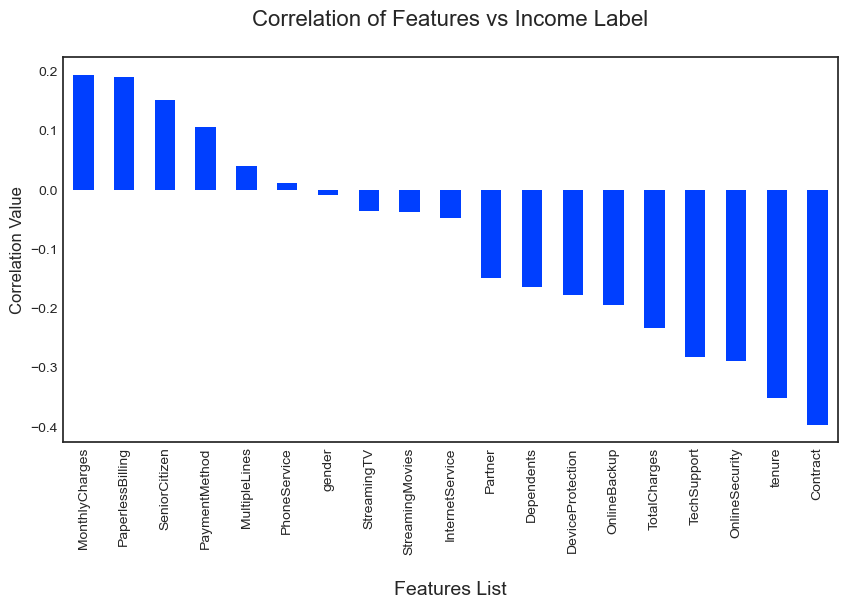

In [34]:
plt.style.use('seaborn-white')

df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Churn'].sort_values(ascending=False).drop('Churn').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Here we can clearly see that Contract, tenure, OnlineSecurity are highly and negatively correlated whereas, monthlycharges, paperlessbilling, seniorcitizen are positively and highly correlated,<br>


# Splitting the Dataframe in Target and Feature Variables

In [35]:
x = df.drop('Churn', axis=1)
y= df['Churn']

# Scaling the data using Standard Scaler

In [36]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,0.059614,-1.181531,-0.918456,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,-1.164135,-2.253826
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.994674,-1.181531,1.405320,-1.029902,1.242972,-0.924901,-1.113775,-1.121714,0.368496,-1.206190,1.338965,-0.262811,0.385534
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,-1.181531,1.405320,1.240410,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,1.338965,-0.365914,-1.443452
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,0.059614,-1.181531,1.405320,-1.029902,1.242972,1.394288,-1.113775,-1.121714,0.368496,-1.206190,-1.471460,-0.750058,0.368779
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.994674,0.175278,-0.918456,-1.029902,-1.027886,-0.924901,-1.113775,-1.121714,-0.830396,0.829057,0.402156,0.194503,-1.228335


# Checking Multicolinearity

In [37]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,gender,1.001820
1,SeniorCitizen,1.149462
2,Partner,1.457888
3,Dependents,1.382061
4,tenure,6.442303
5,PhoneService,1.623170
6,MultipleLines,1.389580
7,InternetService,1.841796
8,OnlineSecurity,1.247525
9,OnlineBackup,1.186274


All columns vif factor is below 10, which is persimssible, so we can proceed.

# Balancing the data using SMOTE

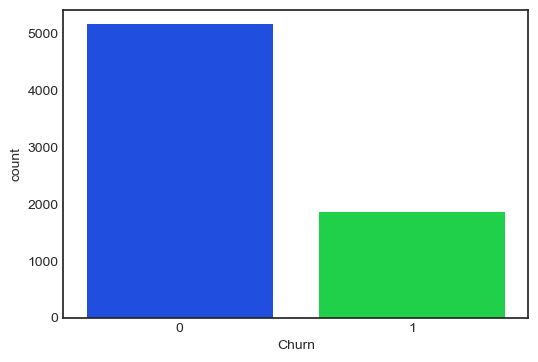

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

We clearly see that the data is imbalanced, which needs to be fixed

In [40]:
sm = SMOTE()
x,y = sm.fit_resample(x, y)

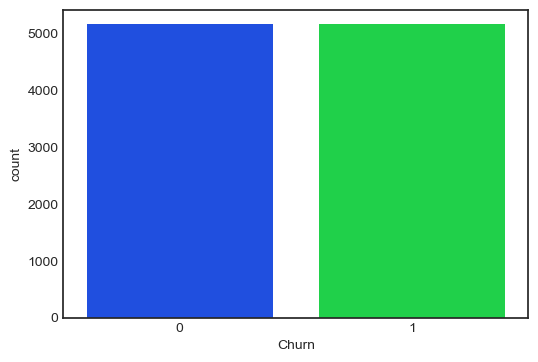

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(y)
plt.show()

Hence using SMOTE technique we have balanced the data

# Finding the Best Random State

In [42]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.20914020139426 on Random State 692


Hence at random state 692 or model is giving best results.

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=692)

# Feature Importance Graph  

,Importance
Features,
tenure,0.143
TotalCharges,0.140
MonthlyCharges,0.137
Contract,0.121
PaymentMethod,0.080
TechSupport,0.061
OnlineSecurity,0.050
InternetService,0.038
PaperlessBilling,0.032


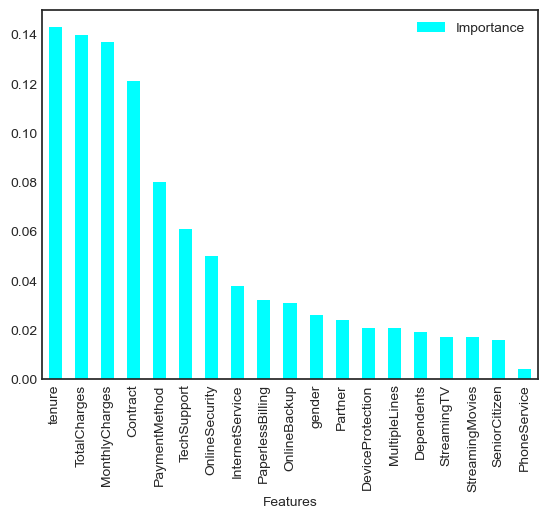

In [44]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

Most important feature from above graph is Contract, followed by total charges. Least important is PhoneService.

# Training the Model

LogisticRegression()
Accuracy Score of LogisticRegression() is: 80.20914020139426
Cross Validation Score are : [0.7804878  0.75813008 0.7703252  0.77830508 0.77152542 0.78644068
 0.78983051]
Cross Validation Score: 78.98305084745762
Accuracy Score - CV_Score 1.2260893539366435
[[ 996  270]
 [ 241 1075]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1266
           1       0.80      0.82      0.81      1316

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

AUC Score of  LogisticRegression() is 0.8017995793658796


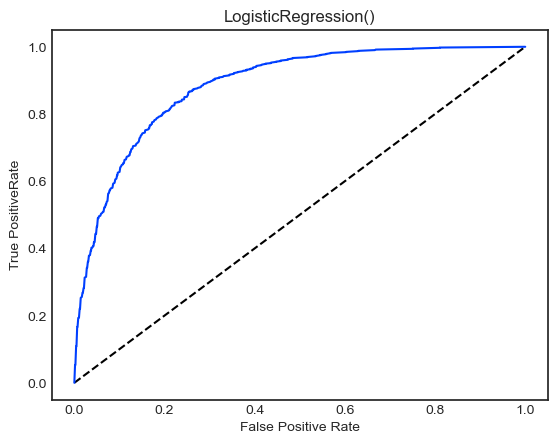



-------------------------------------------------------------------------------
GaussianNB()
Accuracy Score of GaussianNB() is: 78.96979085979861
Cross Validation Score are : [0.76151762 0.7601626  0.7601626  0.76677966 0.77830508 0.77559322
 0.77559322]
Cross Validation Score: 77.83050847457628
Accuracy Score - CV_Score 1.1392823852223302
[[ 957  309]
 [ 234 1082]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1266
           1       0.78      0.82      0.80      1316

    accuracy                           0.79      2582
   macro avg       0.79      0.79      0.79      2582
weighted avg       0.79      0.79      0.79      2582

AUC Score of  GaussianNB() is 0.789056310232069


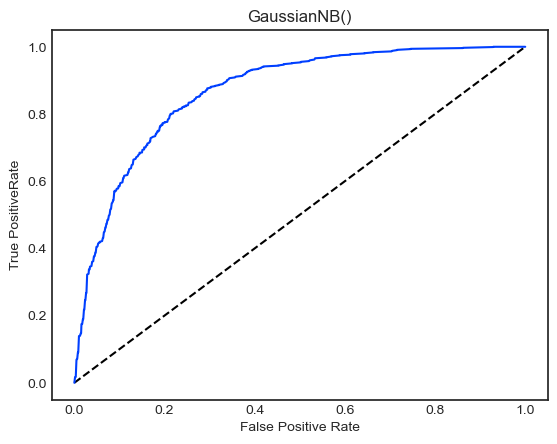



-------------------------------------------------------------------------------
DecisionTreeClassifier()
Accuracy Score of DecisionTreeClassifier() is: 80.24786986831913
Cross Validation Score are : [0.71612466 0.69308943 0.76897019 0.82779661 0.82576271 0.85016949
 0.83661017]
Cross Validation Score: 85.01694915254238
Accuracy Score - CV_Score -4.769079284223253
[[1023  243]
 [ 267 1049]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1266
           1       0.81      0.80      0.80      1316

    accuracy                           0.80      2582
   macro avg       0.80      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

AUC Score of  DecisionTreeClassifier() is 0.8025846670219968


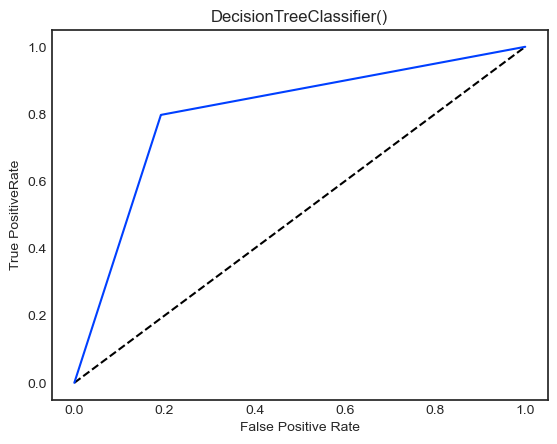



-------------------------------------------------------------------------------
KNeighborsClassifier()
Accuracy Score of KNeighborsClassifier() is: 80.286599535244
Cross Validation Score are : [0.77235772 0.77371274 0.79200542 0.80135593 0.80271186 0.81966102
 0.81084746]
Cross Validation Score: 81.96610169491525
Accuracy Score - CV_Score -1.6795021596712587
[[ 894  372]
 [ 137 1179]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1266
           1       0.76      0.90      0.82      1316

    accuracy                           0.80      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.81      0.80      0.80      2582

AUC Score of  KNeighborsClassifier() is 0.8010288969878565


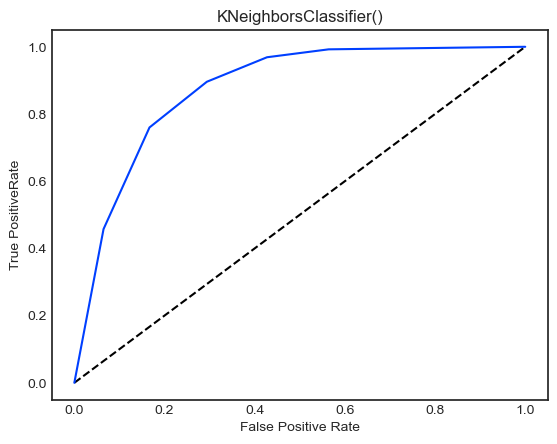



-------------------------------------------------------------------------------
RandomForestClassifier()
Accuracy Score of RandomForestClassifier() is: 86.79318357862122
Cross Validation Score are : [0.77506775 0.76558266 0.83807588 0.89152542 0.90101695 0.90305085
 0.9179661 ]
Cross Validation Score: 91.79661016949152
Accuracy Score - CV_Score -5.003426590870291
[[1103  163]
 [ 178 1138]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1266
           1       0.87      0.86      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

AUC Score of  RandomForestClassifier() is 0.8679948333069236


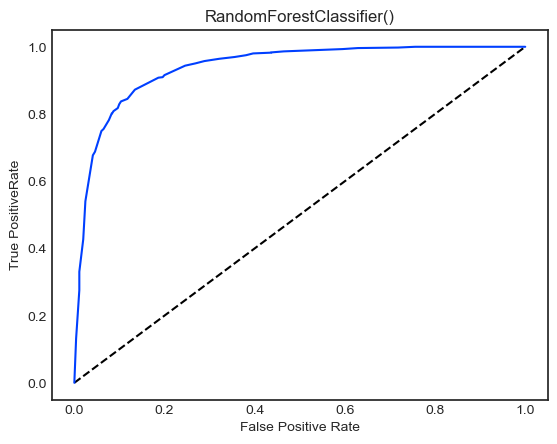



-------------------------------------------------------------------------------
SVC(kernel='poly', probability=True)
Accuracy Score of SVC(kernel='poly', probability=True) is: 80.48024786986832
Cross Validation Score are : [0.77439024 0.76829268 0.78116531 0.79661017 0.79525424 0.80677966
 0.81966102]
Cross Validation Score: 81.96610169491525
Accuracy Score - CV_Score -1.4858538250469309
[[ 994  272]
 [ 232 1084]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1266
           1       0.80      0.82      0.81      1316

    accuracy                           0.80      2582
   macro avg       0.81      0.80      0.80      2582
weighted avg       0.80      0.80      0.80      2582

AUC Score of  SVC(kernel='poly', probability=True) is 0.8044291428379358


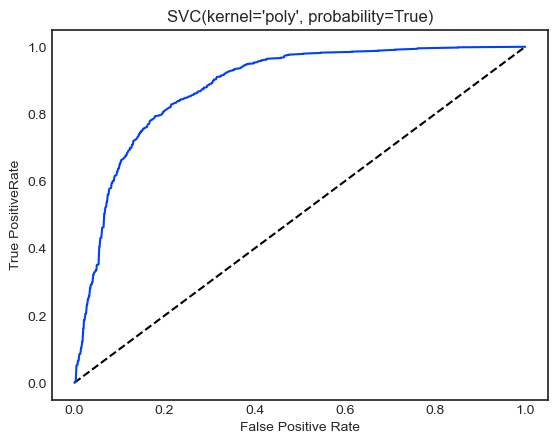



-------------------------------------------------------------------------------
ExtraTreesClassifier()
Accuracy Score of ExtraTreesClassifier() is: 86.87064291247096
Cross Validation Score are : [0.80758808 0.80284553 0.84417344 0.89152542 0.91186441 0.90711864
 0.92135593]
Cross Validation Score: 92.13559322033899
Accuracy Score - CV_Score -5.264950307868034
[[1094  172]
 [ 167 1149]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1266
           1       0.87      0.87      0.87      1316

    accuracy                           0.87      2582
   macro avg       0.87      0.87      0.87      2582
weighted avg       0.87      0.87      0.87      2582

AUC Score of  ExtraTreesClassifier() is 0.8686196622442461


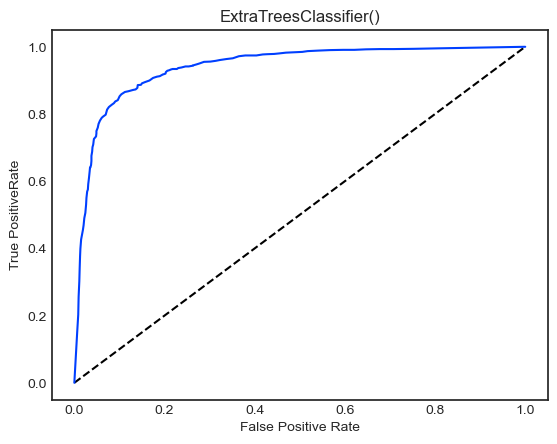



-------------------------------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=F

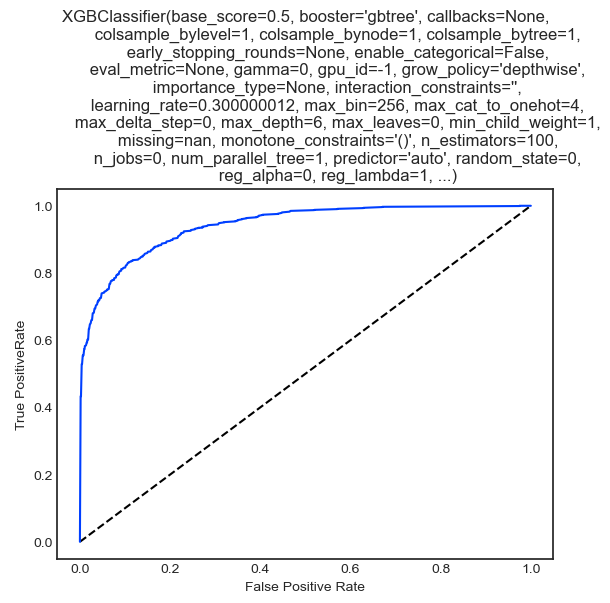



-------------------------------------------------------------------------------
LGBMClassifier()
Accuracy Score of LGBMClassifier() is: 86.40588690937257
Cross Validation Score are : [0.74390244 0.73373984 0.82859079 0.89830508 0.90305085 0.90711864
 0.92474576]
Cross Validation Score: 92.47457627118644
Accuracy Score - CV_Score -6.068689361813867
[[1106  160]
 [ 191 1125]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1266
           1       0.88      0.85      0.87      1316

    accuracy                           0.86      2582
   macro avg       0.86      0.86      0.86      2582
weighted avg       0.86      0.86      0.86      2582

AUC Score of  LGBMClassifier() is 0.8642404577037026


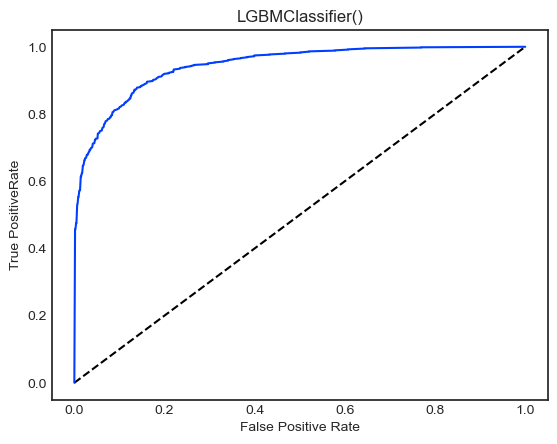



-------------------------------------------------------------------------------


In [45]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True,kernel ='poly')
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    
    y_pred_prob = m.predict_proba(x_test)[:,-1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("AUC Score of ",m,"is",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    plt.title(m)
    plt.show()
    print('\n')
    print('-------------------------------------------------------------------------------')

Let's plot a performance table

In [50]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[80.20,78.96,80.24,80.28,86.79,80.48,86.87,85.59,86.40],
                                 "Cv Score":[79.98,77.83,85.01,81.96,91.79,81.96,92.13,92.40,92.47],
                                 "Result":[1.22,1.13,-4.76,-1.67,-5.00,-1.48,-5.26,-6.81,-6.06],
                                 "AUC Score":[0.80,0.78,0.80,0.80,0.86,0.80,0.86,0.85,0.86]})

Performance_table

,Model,Accuracy_score,Cv Score,Result,AUC Score
0,LR,80.20,79.98,1.22,0.80
1,GNB,78.96,77.83,1.13,0.78
2,DTC,80.24,85.01,-4.76,0.80
3,KNC,80.28,81.96,-1.67,0.80
4,RFC,86.79,91.79,-5.00,0.86
5,SVC,80.48,81.96,-1.48,0.80
6,ETC,86.87,92.13,-5.26,0.86
7,XGB,85.59,92.40,-6.81,0.85
8,LGBM,86.40,92.47,-6.06,0.86


We observe from abovr table that ETC is giving best results so we ETC

# Hypertuning

In [51]:
param = {'n_estimators':[10,50,60,100],
        'criterion':['gini', 'entropy', 'log_loss'],
        'max_depth':[2,4,8],'min_samples_split':[2,5,8],
        'max_features':['sqrt', 'log2','auto',None]} 

# refering parameter from sklearn google document

In [52]:
GCV = GridSearchCV(ExtraTreesClassifier(), param, cv=8)

In [53]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8],
                         'max_features': ['sqrt', 'log2', 'auto', None],
                         'min_samples_split': [2, 5, 8],
                         'n_estimators': [10, 50, 60, 100]})

In [54]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [55]:
GCV.best_score_

0.8161614118244079

# Final Model

In [60]:
final_model = ExtraTreesClassifier(criterion= 'gini',max_depth =8, max_features=None, min_samples_split=2,n_estimators=100)

Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 84.4306738962045


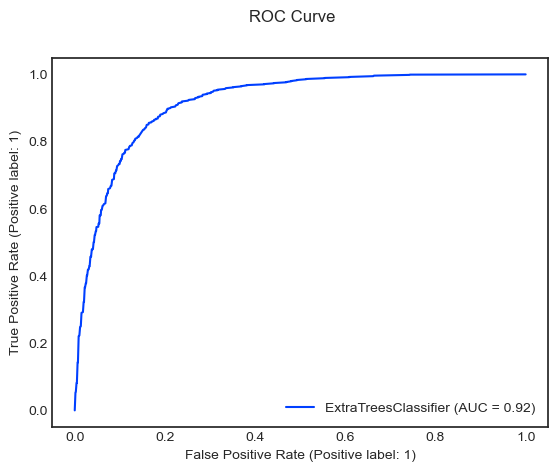

In [61]:
# visualization of final model
roc = metrics.plot_roc_curve(final_model, x_test, y_test)
roc.figure_.suptitle("ROC Curve")
plt.show()

Our final model is performing with 84% accuracy and AUc score of 92%

# Confusion Matrix

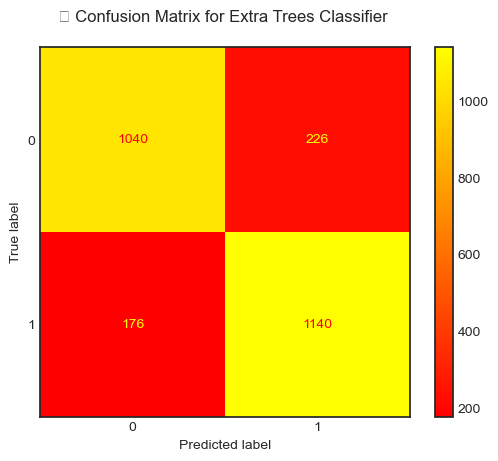

In [62]:
#plotting confusion matrix
names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='autumn')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

Yellow shows number of times our model has predicted correctly and red shows no. of times our model has not predicted correctly.

# Saving the Model

In [63]:
file = "CustomerChurn_E07.pkl"
joblib.dump(final_model, file)

['CustomerChurn_E07.pkl']

# Thanks for Evaluating